# Problem 1

$\begin{align}
&\text{To be able to use inversion method for sampling from circular region, first we should find the CDF by integrating the PDF:} \\\\
&PDF(r) = p(r) = \left\{\begin{matrix} 2r,\ 0\leq r\leq 1\\ 0, \ otherwise \end{matrix}\right. \\\\
&CDF(r) = P(r) = \int_{0}^{r} p(x)dx = r^{2} = u\\\\
&\text{Now we should take the inverse of P(r) to be able to sample from p(r).}\\\\
&P^{-1}(u) = r = \sqrt{u} \\\\
&\text{So sampling uniformly from (0,1) and taking the square root of the results gives us random samples from p(r).}\\\\
&\text{Then, we sample uniformly from (0,2$\pi$) for $\theta$ and then we get the related x and y values by transforming polar coordinates to Cartesian coordinates as follows:}\\\\
&x = rcos(\theta) \ \ , \ y = rsin(\theta)\\\\ 
\end{align}$

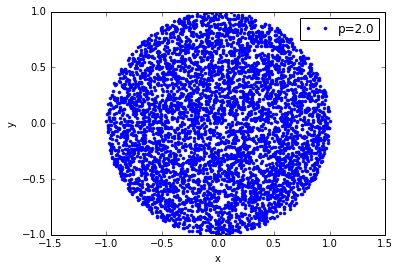

In [424]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

N = 5000

theta = np.random.rand(N)*2*np.pi
r = (np.random.rand(N))**(1/2) #This part uses inversion.  u=F(r)=r^2  => F−1(u)=r=sqrt(u) 
xx = r*np.cos(theta)
yy = r*np.sin(theta)

plt.axis('equal')
plt.plot(xx, yy, 'b.', label = 'p=2.0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Problem 2


We can use the sampler above to sample from unit 2-norm ball and use rejection sampling by rejecting the samples which are not enclosed by the related p-norm ball



## Rejection sampling for p = 1.5

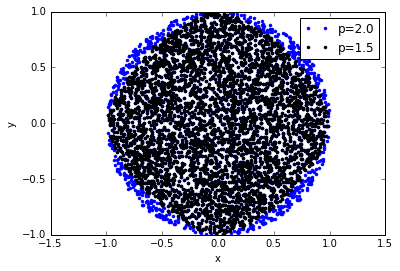

Accept rate:  0.8774


In [425]:
def accept(randX, randY, p):        
        return (abs(randX)**p + abs(randY)**p)**(1/p) <= 1

count=0
theta = np.random.rand(N)*2*np.pi
r = np.sqrt(np.random.rand(N)) 

xx = r*np.cos(theta)
yy = r*np.sin(theta)

axx = []
ayy = []

for i in range(0, N):
    if accept(xx[i],yy[i], 1.5):
        count = count + 1
        axx.append(xx[i])
        ayy.append(yy[i])
        
plt.axis('equal')
plt.plot(xx, yy, 'b.', label = 'p=2.0')
plt.plot(axx,ayy,'k.', label = 'p=1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("Accept rate: ", count/N)





## Rejection sampling for p = 0.7

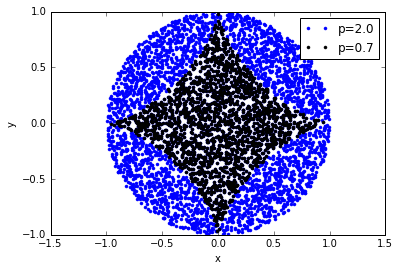

Accept rate:  0.4122


In [426]:
count = 0
theta = np.random.rand(N)*2*np.pi
r = np.sqrt(np.random.rand(N)) #This part uses inversion.  u=F(r)=r^2  => F−1(u)=r=sqrt(u) 
xx = r*np.cos(theta)
yy = r*np.sin(theta)

axx = []
ayy = []

for i in range(0, N):
    if accept(xx[i],yy[i], 0.7):
        count = count + 1
        axx.append(xx[i])
        ayy.append(yy[i])
        
        
plt.axis('equal')
plt.plot(xx, yy, 'b.', label = 'p=2.0')
plt.plot(axx, ayy, 'k.', label = 'p=0.7')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print("Accept rate: ", count/N)

## A better proposal for p = 0.7

$\text{A better proposal for p=0.7 would be to use a unit square rotated around the origin by } \mathrm{\pi /4} \text{ degrees.}\\$ 

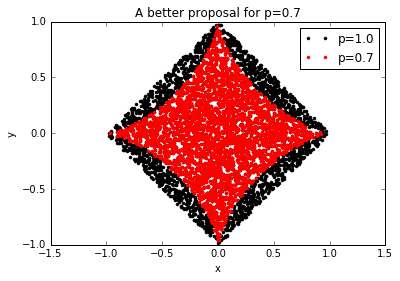

Accept rate:  0.6352


In [427]:
 
normX = np.random.rand(N)*np.sqrt(2)-np.sqrt(2)/2
normY = np.random.rand(N)*np.sqrt(2)-np.sqrt(2)/2
t=np.pi/4

rotX = normX*np.cos(t) - normY*np.sin(t)
rotY = normX*np.sin(t) + normY*np.cos(t)

ax = []
ay = []

count = 0
for i in range(0, N):
    if accept(rotX[i],rotY[i],0.7):
        count = count + 1
        ax.append(rotX[i])
        ay.append(rotY[i])
        
plt.axis('equal')
plt.plot(rotX, rotY, 'k.', label='p=1.0')
plt.plot(ax, ay, 'r.', label='p=0.7')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('A better proposal for p=0.7')
plt.show()
print("Accept rate: ", count/N)
